In [3]:
# hello mehak

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model Building

In [5]:
df = pd.read_csv('/content/final_dataset')
df

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,RetinaDisplay,ppi,Cpu brand,clockspeed,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,1,226.983005,Intel Core i5,2.3,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,1.8,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,0,141.211998,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,1,220.534624,Intel Core i7,2.7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,1,226.983005,Intel Core i5,3.1,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,0,157.350512,Intel Core i7,2.5,0,128,Intel,Windows
1298,1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,0,276.053530,Intel Core i7,2.5,0,512,Intel,Windows
1299,1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,0,111.935204,Other Intel Processor,1.6,0,0,Intel,Windows
1300,1301,HP,Notebook,6,2.19,40705.9200,0,0,0,100.454670,Intel Core i7,2.5,1000,0,AMD,Windows


In [6]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [7]:
df.isnull().sum()

,0
Company,0
TypeName,0
Ram,0
Weight,0
Price,0
Touchscreen,0
Ips,0
RetinaDisplay,0
ppi,0
Cpu brand,0


In [8]:
from sklearn.impute import KNNImputer

columns_for_imputation = ['clockspeed', 'Ram', 'Weight', 'ppi', 'HDD', 'SSD']
df_subset = df[columns_for_imputation]

imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df_subset), columns=df_subset.columns)


df['clockspeed'] = df_imputed['clockspeed']


In [9]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,RetinaDisplay,ppi,Cpu brand,clockspeed,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,1,226.983005,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,0,141.211998,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,1,220.534624,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,1,226.983005,Intel Core i5,3.1,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,0,157.350512,Intel Core i7,2.5,0,128,Intel,Windows
1298,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,0,276.053530,Intel Core i7,2.5,0,512,Intel,Windows
1299,Lenovo,Notebook,2,1.50,12201.1200,0,0,0,111.935204,Other Intel Processor,1.6,0,0,Intel,Windows
1300,HP,Notebook,6,2.19,40705.9200,0,0,0,100.454670,Intel Core i7,2.5,1000,0,AMD,Windows


In [10]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [11]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,RetinaDisplay,ppi,Cpu brand,clockspeed,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,1,226.983005,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,0,127.677940,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,0,141.211998,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,1,220.534624,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,1,226.983005,Intel Core i5,3.1,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,1.80,1,1,0,157.350512,Intel Core i7,2.5,0,128,Intel,Windows
1298,Lenovo,2 in 1 Convertible,16,1.30,1,1,0,276.053530,Intel Core i7,2.5,0,512,Intel,Windows
1299,Lenovo,Notebook,2,1.50,0,0,0,111.935204,Other Intel Processor,1.6,0,0,Intel,Windows
1300,HP,Notebook,6,2.19,0,0,0,100.454670,Intel Core i7,2.5,1000,0,AMD,Windows


In [12]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1297,10.433899
1298,11.288115
1299,9.409283
1300,10.614129


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [14]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,RetinaDisplay,ppi,Cpu brand,clockspeed,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,0,100.454670,Intel Core i5,2.50,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,0,141.211998,Intel Core i7,2.80,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,0,135.094211,Other Intel Processor,1.60,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,0,141.211998,Intel Core i3,2.30,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,0,141.211998,Intel Core i5,2.50,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,0,100.454670,Intel Core i3,1.90,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,0,141.211998,Intel Core i7,2.70,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,0,100.454670,AMD Processor,2.50,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,0,100.454670,Intel Core i3,2.36,2000,0,Nvidia,Others/No OS/Linux


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Toshiba'

In [17]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,RetinaDisplay,ppi,Cpu brand,clockspeed,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,0,100.454670,Intel Core i5,2.50,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,0,141.211998,Intel Core i7,2.80,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,0,135.094211,Other Intel Processor,1.60,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,0,141.211998,Intel Core i3,2.30,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,0,141.211998,Intel Core i5,2.50,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,0,100.454670,Intel Core i3,1.90,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,0,141.211998,Intel Core i7,2.70,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,0,100.454670,AMD Processor,2.50,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,0,100.454670,Intel Core i3,2.36,2000,0,Nvidia,Others/No OS/Linux


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [19]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear regression

In [20]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),  # Categorical columns
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])  # Numerical columns to scale
    ],
    remainder='passthrough'  # Pass through the other columns without changes
)

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8101802104032808
MAE 0.20711124560013894


### Ridge Regression

In [21]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),  # Categorical columns
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])  # Numerical columns to scale
    ],
    remainder='passthrough'  # Pass through the other columns without changes
)


step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8150459159265199
MAE 0.20722117071999938


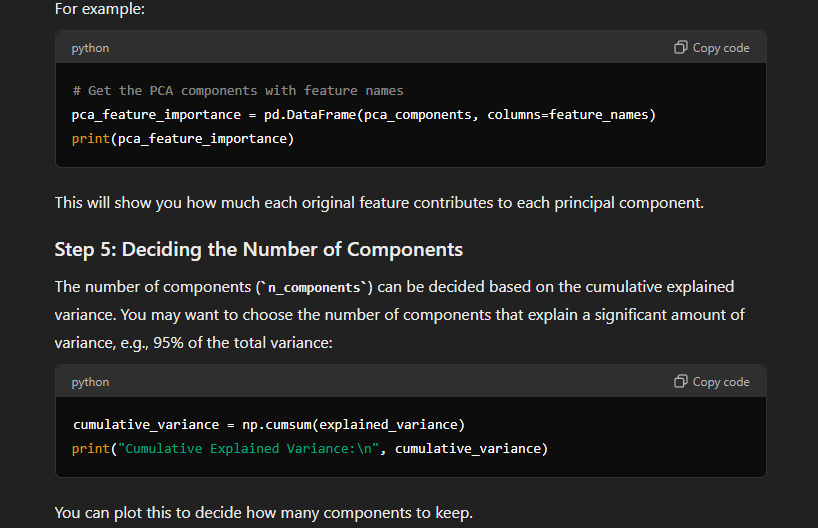

In [22]:
from sklearn.decomposition import PCA

In [23]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)


step2 = PCA(n_components=10)

step3 = Ridge(alpha=10)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])


pipe.fit(X_train, y_train)


y_pred = pipe.predict(X_test)


print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.7739939209337424
MAE 0.23029664079679266


In [24]:
from sklearn.model_selection import GridSearchCV

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)


step2 = PCA()


step3 = Ridge()


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])

param_grid = {
    'step2__n_components': [3,4,5,6,7,8,9,10,11,12],  # Example PCA components to try
    'step3__alpha': [0.1, 1, 10, 100]  # Example alphas for Ridge regression
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


Best parameters found:  {'step2__n_components': 12, 'step3__alpha': 10}
R2 score 0.7726301704368255
MAE 0.23571884694255554


In [25]:

n_components = None


pipe_with_pca = Pipeline(steps=[('preprocessor', preprocessor),
                                ('pca', PCA(n_components=n_components)),
                                ('regressor', Ridge(alpha=1.0))])


pipe_with_pca.fit(X_train, y_train)


y_pred_pca = pipe_with_pca.predict(X_test)

print(f"Ridge Regression with PCA RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_pca))}")


pca_components = pipe_with_pca.named_steps['pca'].components_
explained_variance = pipe_with_pca.named_steps['pca'].explained_variance_ratio_

print("PCA Components:\n", pca_components)
print("Explained Variance Ratio:\n", explained_variance)

NameError: name 'preprocessor' is not defined

### Lasso Regression

In [26]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)
step2 = Lasso()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid = {
    'step2__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print("Best parameters found: ", grid_search.best_params_)

R2 score 0.8116291294730765
MAE 0.20662517085443557
Best parameters found:  {'step2__alpha': 0.0001}


### KNN

In [27]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)
step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8604985496313851
MAE 0.1701234902426933


### Decision Tree

In [28]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8204632101647712
MAE 0.19825445279096324


### SVM

In [29]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0, 1, 8, 12, 13])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8209791497703769
MAE 0.19672397280570603


### Random Forest

In [32]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)

step2 = RandomForestRegressor(n_estimators=200,
                              random_state=3,
                              max_samples=1.0,
                              max_features=0.5,
                              max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9033911218530958
MAE 0.14713504216060427


In [31]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)

step2 = RandomForestRegressor(random_state=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid = {
    'step2__n_estimators': [200, 300, 350, 400],
    'step2__max_depth': [10, 15, 20],
    'step2__max_features': [0.5, 0.75, 1.0],
    'step2__max_samples': [0.5, 0.75, 1.0]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print("Best parameters found: ", grid_search.best_params_)


KeyboardInterrupt: 

### ExtraTrees

In [ ]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)


step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap = True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8945132836018602
MAE 0.1572731292941493


### AdaBoost

In [ ]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)


step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7956458854701136
MAE 0.23302802776339737


### Gradient Boost

In [ ]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)


step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.895078394935298
MAE 0.1497060831937478


### XgBoost

In [ ]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)


step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8876978538569517
MAE 0.15502783354968577


### Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)



rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10, bootstrap = True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8978885781760733
MAE 0.15372194876594011


### Stacking

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 12, 13]),
        ('num_scaler', StandardScaler(), [2, 3, 7, 9, 10, 11])
    ],
    remainder='passthrough'
)

#  {'step2__max_depth': 20, 'step2__max_features': 0.5, 'step2__max_samples': 1.0, 'step2__n_estimators': 200}

estimators = [
    ('rf', RandomForestRegressor(n_estimators=200,random_state=3,max_samples=1.0,max_features=0.5,max_depth=20)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8977704498037298
MAE 0.15562028516683926


### Exporting the Model

In [33]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [34]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,RetinaDisplay,ppi,Cpu brand,clockspeed,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,1,226.983005,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,0,141.211998,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,1,220.534624,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,1,226.983005,Intel Core i5,3.1,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,0,157.350512,Intel Core i7,2.5,0,128,Intel,Windows
1298,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,0,276.053530,Intel Core i7,2.5,0,512,Intel,Windows
1299,Lenovo,Notebook,2,1.50,12201.1200,0,0,0,111.935204,Other Intel Processor,1.6,0,0,Intel,Windows
1300,HP,Notebook,6,2.19,40705.9200,0,0,0,100.454670,Intel Core i7,2.5,1000,0,AMD,Windows


In [35]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,RetinaDisplay,ppi,Cpu brand,clockspeed,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,0,100.454670,Intel Core i5,2.50,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,0,141.211998,Intel Core i7,2.80,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,0,135.094211,Other Intel Processor,1.60,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,0,141.211998,Intel Core i3,2.30,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,0,141.211998,Intel Core i5,2.50,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,0,100.454670,Intel Core i3,1.90,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,0,141.211998,Intel Core i7,2.70,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,0,100.454670,AMD Processor,2.50,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,0,100.454670,Intel Core i3,2.36,2000,0,Nvidia,Others/No OS/Linux
